# IT'S ABOUT TIME (AND ICE CREAM)
## ... with some milk and cottage cheese
**_Enough with car prices already, I'm hungry_**
### Data Science 410 BB
#### University of Washington Professional & Continuing Education
#### Homework 8: Time Series Analysis
#### Leo Salemann, 3/1/18


# First, a Bit of Prep Work

## Helper Functions

In [1]:
## Decomposition of the time series into components
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.decomp <- function(df, col = 'elec.ts', span = 0.5, Mult = TRUE, is.df = TRUE){
  # if(Mult) temp = log(df[, col])  else temp = ts(df[, col]
  if(is.df) temp = log(df[, col])  
  else temp = df
  spans = span * length(temp)  
  fit <- stl(temp, s.window = "periodic", t.window = spans)
  plot(fit, main = paste('Decompositon of',col,'with lowess span = ', as.character(span)))
  fit$time.series
}

In [2]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
plot.acf <- function(df, col = 'remainder', is.df =TRUE){
  if(is.df) temp <- df[, col]
  else temp <- df
  par(mfrow = c(2,1))
  acf(temp, main = paste('ACF of', col))
  pacf(temp, main = paste('PACF of', col))
  par(mfrow = c(1,1))
}

In [3]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.diff <- function(ts, lag = 1){
  diff(ts, lag = lag)
}

In [4]:
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
dist.ts = function(df, col = 'residual', bins = 40){
  par(mfrow = c(1,2))
  temp = as.vector(df)
  breaks = seq(min(temp), max(temp), length.out = (bins + 1))
  hist(temp, breaks = breaks, main = paste('Distribution of ', col), xlab = col)
  qqnorm(temp, main = paste('Normal Q-Q plot of ', col))
  par(mfrow = c(1,1))
}

In [5]:
## Function for ARIMA model estimation
## From IntroToTime Series, Stephen Elston, UW Data Science 350, ca. 2/28/18
ts.model = function(ts, col = 'remainder', order = c(0,0,1)){
  mod = arima(ts, order = order, include.mean = FALSE)
  print(mod)
  mod
}

## Load Data, Peek at Some Rows

In [6]:
getwd()
Dairy = read.table('CADairyProduction.csv', sep =",", header = TRUE)
head(Dairy)
tail(Dairy)

[1] "/home/vagrant/git/UW_DataScience/Q2/HW08"

Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
1995,Jan,4.370,51.595,2.112,0.9803,1,1,1
1995,Feb,3.695,56.086,1.932,0.8924,2,4,8
1995,Mar,4.538,68.453,2.162,0.8924,3,9,27
1995,Apr,4.280,65.722,2.130,0.8967,4,16,64
1995,May,4.470,73.730,2.227,0.8967,5,25,125
1995,Jun,4.238,77.994,2.124,0.9160,6,36,216


,Year,Month,Cotagecheese.Prod,Icecream.Prod,Milk.Prod,N.CA.Fat.Price,Month.Count,monthNumSqred,monthNumCubed
223,2013,Jul,2.433,84.026,3.373,1.6923,223,49729,11089567
224,2013,Aug,2.169,78.382,3.400,1.6273,224,50176,11239424
225,2013,Sep,2.193,74.871,3.197,1.5519,225,50625,11390625
226,2013,Oct,2.284,70.011,3.338,1.5566,226,51076,11543176
227,2013,Nov,1.865,61.394,3.275,1.7537,227,51529,11697083
228,2013,Dec,2.345,53.653,3.473,1.6747,228,51984,11852352


**Data is monthly, runs from Jan 1995 to Dec 2013**

In [7]:
cat(2013-1994 , " years\n")
cat(12*(2013-1994), "months")

19  years
228 months

# Sationary & Seasonality

##  First Look

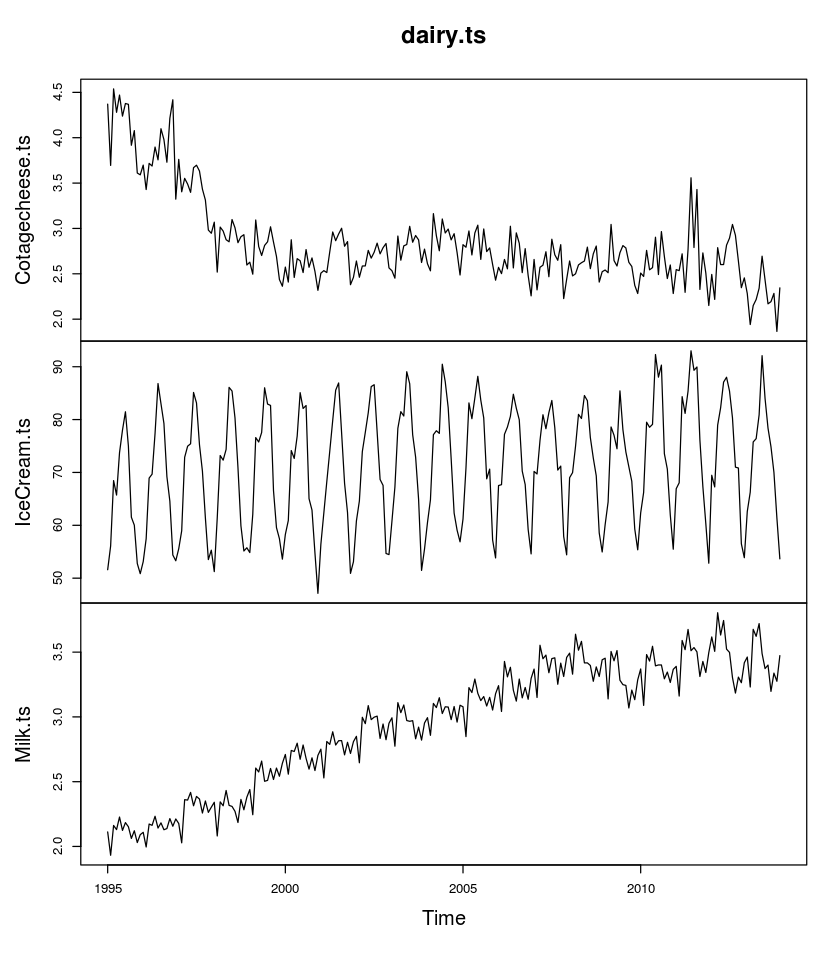

In [8]:
Cotagecheese.ts = ts(Dairy[,3], start = 1995, freq = 12)
IceCream.ts     = ts(Dairy[,4], start = 1995, freq = 12)
Milk.ts         = ts(Dairy[,5], start = 1995, freq = 12)

dairy.ts = cbind(Cotagecheese.ts, IceCream.ts, Milk.ts)
options(repr.pmales.extlot.width=8, repr.plot.height=8)
plot(dairy.ts)

- ** Strong seasonal component in Ice Cream**
- ** Potential seasonal components in Milk and Cottage Cheese, along with nonseasonal/multi-year trends**
- ** Strong trends in Milk and Cottage Cheese; potential trend in Ice Cream.**

### So far, it's ..

|Series        |Sationary? |Seasonal?   |
|--------------|----------:|:-----------|
|Cottage Cheese|No way     |Could be    |
|Ice Cream     |Could be   |Pretty sure |
|Milk          |No way     |Could be    |

# Decompose & Dive Deeper

## Separate Time Series into Seasonal, Trend, Residual Components

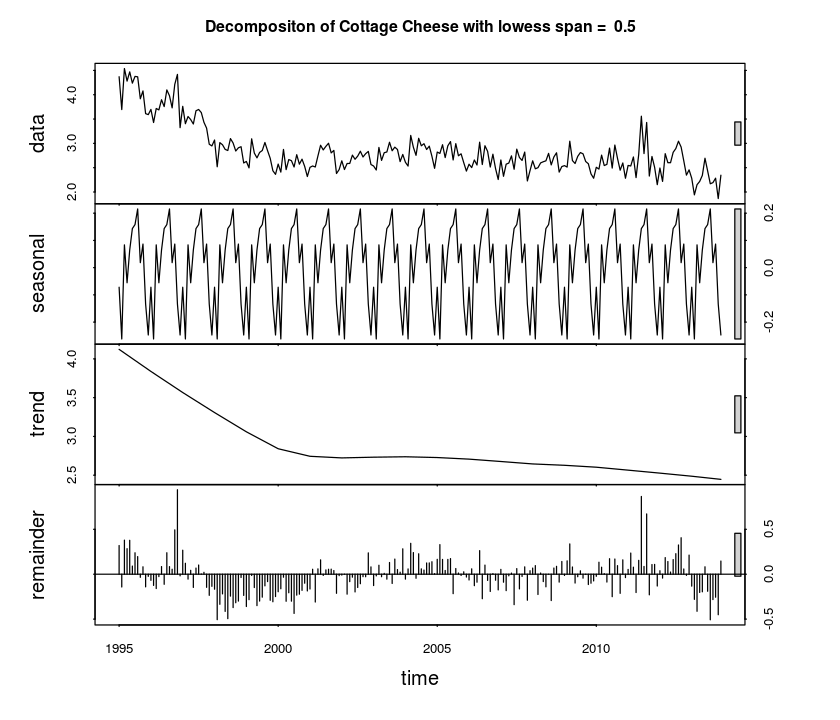

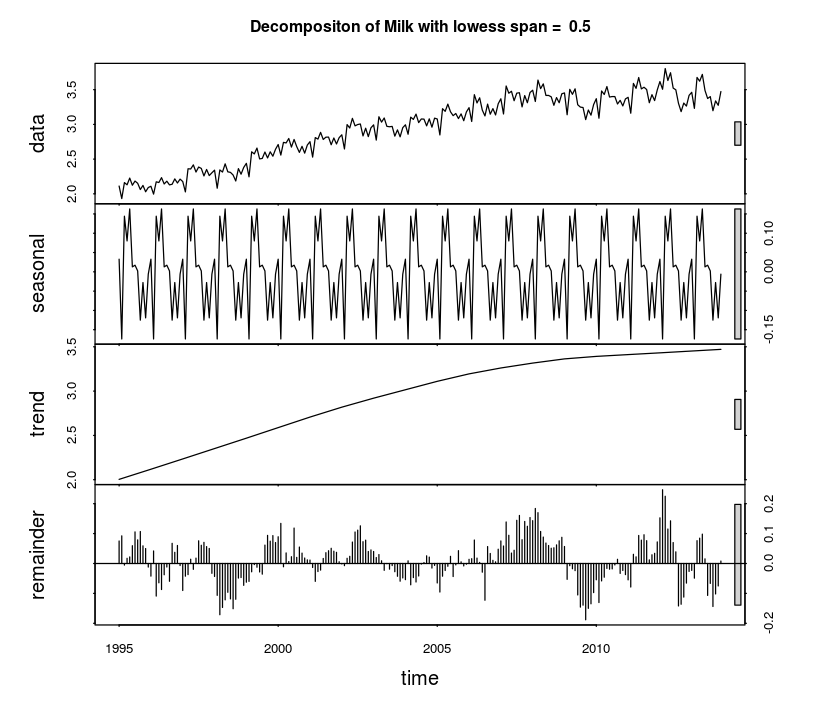

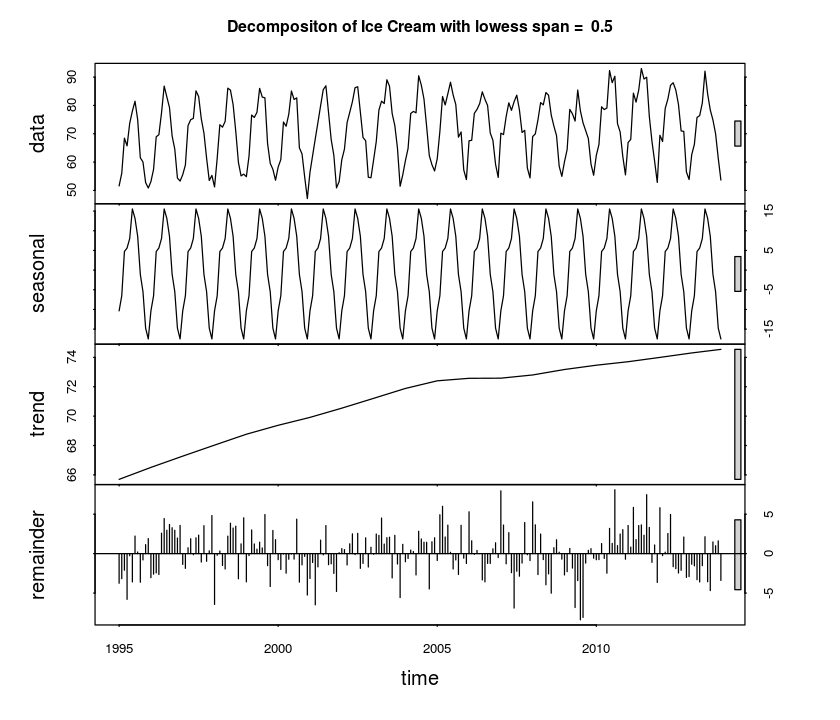

In [9]:
options(repr.pmales.extlot.width=2, repr.plot.height=6)

Cotagecheese.decomp = ts.decomp(Cotagecheese.ts, col= "Cottage Cheese", 
                                Mult = TRUE, is.df = FALSE)
Milk.decomp = ts.decomp(Milk.ts, col= "Milk", 
                        Mult = TRUE, is.df = FALSE)
IceCream.decomp = ts.decomp(IceCream.ts, col= "Ice Cream", 
                            Mult = TRUE, is.df = FALSE)

- **Strong trend component in all 3, can't be stationary. **
- **Seasonal component very clean for Ice Cream; a bit noisy for Milk & Cotage Cheese**
- **Remainders seem to have a bit of a seasonal pattern left in them.**

### So now, it's ..

|Series        |Sationary? |Seasonal?   |
|--------------|----------:|:-----------|
|Cottage Cheese|No way     |Pretty sure |
|Ice Cream     |No way     |Pretty sure |
|Milk          |No way     |Pretty sure |

## Check out the Autocorrelation (ACF/PACF)
_The evidence is pretty strong that the data's not staionary, but I already wrote the code in my draft notebook, so what the heck ..._

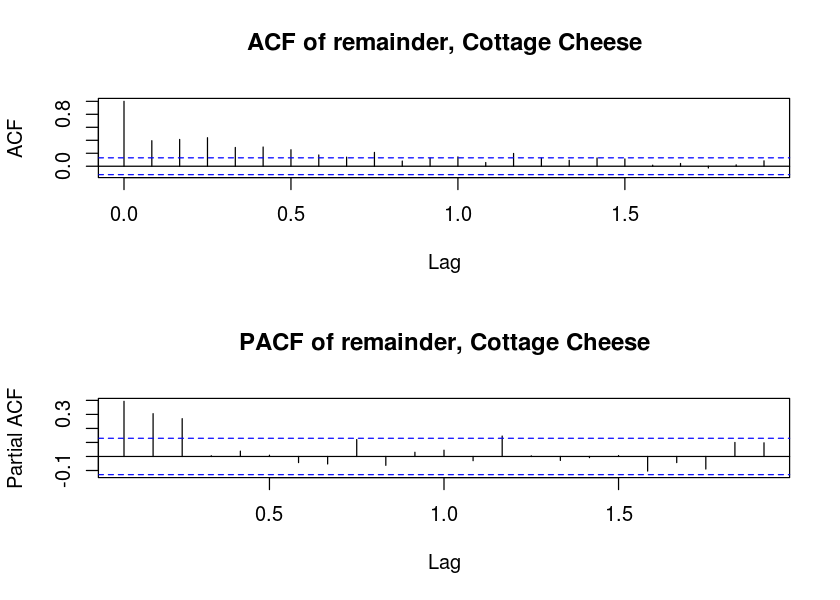

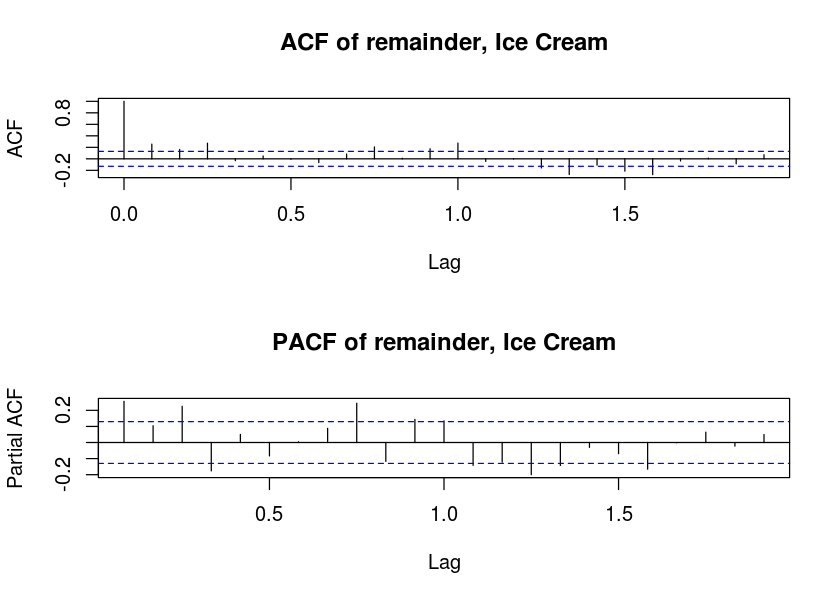

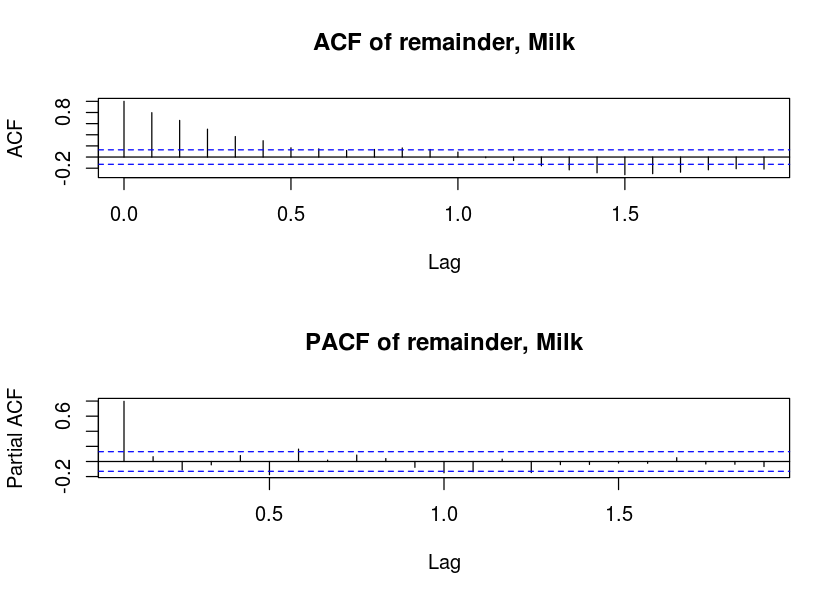

In [10]:
options(repr.pmales.extlot.width=8, repr.plot.height=5)
plot.acf(Cotagecheese.decomp[, 3], col = "remainder, Cottage Cheese", is.df = FALSE)
plot.acf(IceCream.decomp[, 3], col = "remainder, Ice Cream", is.df = FALSE)
plot.acf(Milk.decomp[, 3], col = "remainder, Milk", is.df = FALSE)

- **ACF crosses the 95% confidence interval for multiple lags, for all three products    **
- **PACF crosses the 95% confidence interval for more than one lags, for cotage cheese and ice cream**
- **All three products are non-stationary**

### So now, it's ..

|Series        |Sationary? |Seasonal?   |
|--------------|----------:|:-----------|
|Cottage Cheese|No     |Yes |
|Ice Cream     |No     |Yes |
|Milk          |No     |Yes |

# ARMA Analysis

## Handy Helper Function to "sweep" the p and q values

In [20]:
arma.sweep = function(residuals, name){
  for (p in c(0,1,2)){
      for (q in (c(0,1,2))){
          cat("\n-----------------< order = c(",p,",0,",q,") >-----------------")
          ts.model(residuals, col = paste('ARIMA model for',name), order = c(p,0,q))
          # col = paste('ARIMA model for',name)
          #cat(name)

      }
  }
}

## ARMA, Cottage Cheese

In [12]:
arma.sweep(Cotagecheese.decomp[, 3], "Cottage Cheese")


-----------------< order = c( 0 ,0, 0 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)


sigma^2 estimated as 0.04414:  log likelihood = 32.22,  aic = -62.44

-----------------< order = c( 0 ,0, 1 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1
      0.2877
s.e.  0.0570

sigma^2 estimated as 0.0394:  log likelihood = 45.1,  aic = -86.2

-----------------< order = c( 0 ,0, 2 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1     ma2
      0.1872  0.2674
s.e.  0.0750  0.0712

sigma^2 estimated as 0.03708:  log likelihood = 52,  aic = -98

-----------------< order = c( 1 ,0, 0 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1
      0.4038
s.e.  0.0608

sigma^2 estimated as 0.03696:  log likelihood = 52.34,  aic = -100.69

-----------------< order = c( 1 ,0, 1 ) >-----------------
Call:
arima(x

## For Cottage Cheese, $(p=1, q=2)$ had the best (lowest/most negative) AIC

## ARMA, Ice Cream

In [13]:
arma.sweep(IceCream.decomp[, 3], "Ice Cream")


-----------------< order = c( 0 ,0, 0 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)


sigma^2 estimated as 8.55:  log likelihood = -568.16,  aic = 1138.31

-----------------< order = c( 0 ,0, 1 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1
      0.2440
s.e.  0.0685

sigma^2 estimated as 8.05:  log likelihood = -561.32,  aic = 1126.63

-----------------< order = c( 0 ,0, 2 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1     ma2
      0.2227  0.0441
s.e.  0.0833  0.0910

sigma^2 estimated as 8.042:  log likelihood = -561.2,  aic = 1128.39

-----------------< order = c( 1 ,0, 0 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1
      0.2586
s.e.  0.0642

sigma^2 estimated as 7.981:  log likelihood = -560.34,  aic = 1124.68

-----------------< order = c( 1 ,0, 1 ) >-----------------
Call

## For Ice Cream, $(p=2, q=2)$ had the best (lowest) AIC, but $(p=2, q=0)$ has better standard error on the coefficients

## ARMA, Milk

In [14]:
arma.sweep(Milk.decomp[, 3], "Milk")


-----------------< order = c( 0 ,0, 0 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)


sigma^2 estimated as 0.005864:  log likelihood = 262.33,  aic = -522.65

-----------------< order = c( 0 ,0, 1 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1
      0.6539
s.e.  0.0458

sigma^2 estimated as 0.003274:  log likelihood = 328.49,  aic = -652.98

-----------------< order = c( 0 ,0, 2 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ma1     ma2
      0.6781  0.5781
s.e.  0.0519  0.0553

sigma^2 estimated as 0.002464:  log likelihood = 360.67,  aic = -715.34

-----------------< order = c( 1 ,0, 0 ) >-----------------
Call:
arima(x = ts, order = order, include.mean = FALSE)

Coefficients:
         ar1
      0.7984
s.e.  0.0394

sigma^2 estimated as 0.002109:  log likelihood = 378.36,  aic = -752.73

-----------------< order = c( 1 ,0, 1 ) >-----------

## For Milk, $(p=1, q=2)$ had the best (lowest) AIC

# 12 Month Forecast

## Cottage Cheese ($p=1, q=2$ had the best  AIC)

In [34]:
require(forecast)
fit.Cotagecheese = auto.arima(Cotagecheese.ts, max.order=7,
                              start.p=0,        start.q=0, 
                                max.p=1, max.d=0, max.q=2,
                              start.P=0,        start.Q=0,
                                max.P=1, max.D=1, max.Q=2)
summary(fit.Cotagecheese )

Series: Cotagecheese.ts 
ARIMA(1,0,0)(1,0,0)[12] with non-zero mean 

Coefficients:
         ar1    sar1    mean
      0.7626  0.4973  2.8964
s.e.  0.0496  0.0705  0.1282

sigma^2 estimated as 0.06092:  log likelihood=-5.18
AIC=18.35   AICc=18.53   BIC=32.07

Training set error measures:
                      ME      RMSE       MAE       MPE    MAPE      MASE
Training set -0.01703949 0.2451943 0.1867689 -1.275668 6.63175 0.7993123
                   ACF1
Training set -0.3592293


**Standard Error for both coefficients an order of magnitude smaller the coefficients themselves**


Forecast method: ARIMA(1,0,0)(1,0,0)[12] with non-zero mean

Model Information:
Series: Cotagecheese.ts 
ARIMA(1,0,0)(1,0,0)[12] with non-zero mean 

Coefficients:
         ar1    sar1    mean
      0.7626  0.4973  2.8964
s.e.  0.0496  0.0705  0.1282

sigma^2 estimated as 0.06092:  log likelihood=-5.18
AIC=18.35   AICc=18.53   BIC=32.07

Error measures:
                      ME      RMSE       MAE       MPE    MAPE      MASE
Training set -0.01703949 0.2451943 0.1867689 -1.275668 6.63175 0.7993123
                   ACF1
Training set -0.3592293

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       2.337744 2.021427 2.654061 1.853979 2.821509
Feb 2014       2.228234 1.830429 2.626038 1.619844 2.836623
Mar 2014       2.377997 1.939713 2.816281 1.707700 3.048294
Apr 2014       2.446262 1.986071 2.906453 1.742460 3.150063
May 2014       2.534580 2.062115 3.007045 1.812006 3.257153
Jun 2014       2.730463 2.251003 3.209922 1.997193 3.463733
Jul 2014       2.

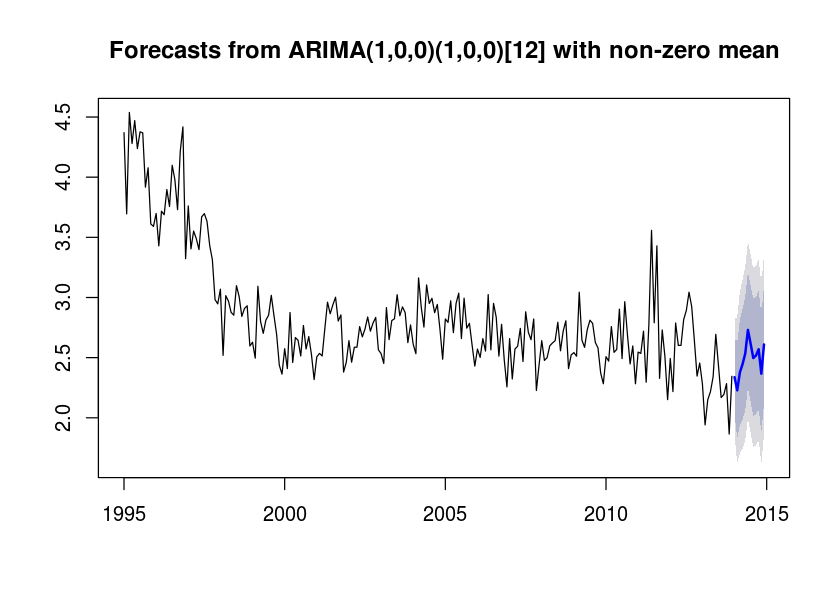

In [35]:
## Make the forecast for the next year
Cotagecheese.forecast = forecast(fit.Cotagecheese , h=12)
summary(Cotagecheese.forecast)
plot(Cotagecheese.forecast)

** Well, that didn't work too well. Now I know why Cottage Cheese wans't part of the original assingment **

## Ice Cream ($p=2, q=2$ had the best AIC)

In [44]:
require(forecast)
fit.IceCream = auto.arima(IceCream.ts, max.order=7,
                              start.p=0,        start.q=0, 
                                max.p=2, max.d=0, max.q=2,
                              start.P=0,        start.Q=0,
                                max.P=2, max.D=0, max.Q=2)
summary(fit.IceCream )

Series: IceCream.ts 
ARIMA(2,0,1)(0,0,2)[12] with non-zero mean 

Coefficients:
         ar1     ar2     ma1    sma1    sma2     mean
      -0.185  0.5525  0.9730  0.8583  0.5565  70.6332
s.e.   0.061  0.0600  0.0168  0.0629  0.0556   1.9301

sigma^2 estimated as 16.93:  log likelihood=-649.78
AIC=1313.57   AICc=1314.08   BIC=1337.57

Training set error measures:
                    ME     RMSE     MAE        MPE     MAPE     MASE
Training set 0.1102792 4.059884 3.24633 -0.3754769 4.705799 1.176165
                    ACF1
Training set -0.02392642


**Standard Error for some of the coefficients an order of magnitude smaller the coefficients themselves**


Forecast method: ARIMA(2,0,1)(0,0,2)[12] with non-zero mean

Model Information:
Series: IceCream.ts 
ARIMA(2,0,1)(0,0,2)[12] with non-zero mean 

Coefficients:
         ar1     ar2     ma1    sma1    sma2     mean
      -0.185  0.5525  0.9730  0.8583  0.5565  70.6332
s.e.   0.061  0.0600  0.0168  0.0629  0.0556   1.9301

sigma^2 estimated as 16.93:  log likelihood=-649.78
AIC=1313.57   AICc=1314.08   BIC=1337.57

Error measures:
                    ME     RMSE     MAE        MPE     MAPE     MASE
Training set 0.1102792 4.059884 3.24633 -0.3754769 4.705799 1.176165
                    ACF1
Training set -0.02392642

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       59.10526 53.83246 64.37807 51.04120 67.16932
Feb 2014       64.32871 57.61535 71.04206 54.06152 74.59590
Mar 2014       69.12883 62.08120 76.17646 58.35041 79.90725
Apr 2014       70.67692 63.37788 77.97596 59.51400 81.83983
May 2014       73.00983 65.66333 80.35634 61.77433 84.24534
Jun 20

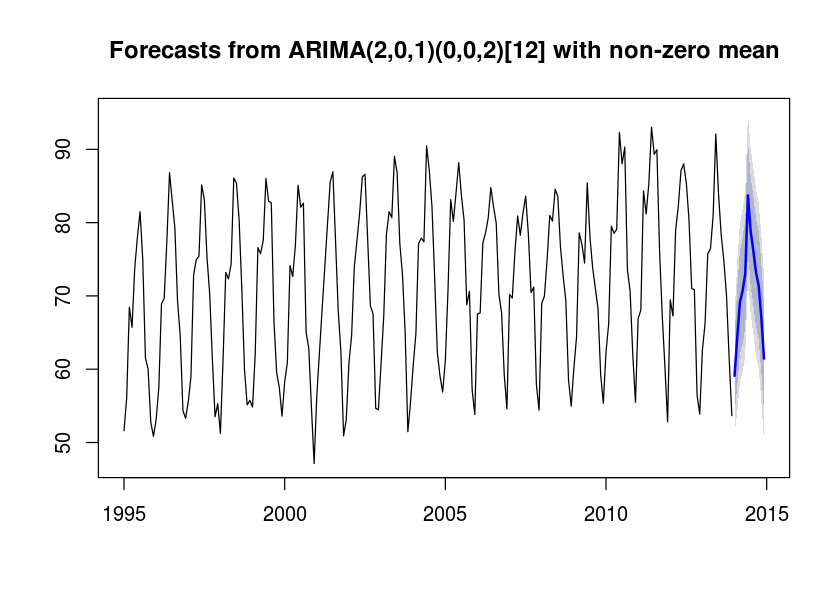

In [45]:
## Make the forecast for the next year
IceCream.forecast = forecast(fit.IceCream , h=12)
summary(IceCream.forecast)
plot(IceCream.forecast)

**Better than cottage cheese, anyway.**

**Fun fact: Introducing max.D=1 in the arima() call produces less standard error in the coefficients, as wel as a tighter forecast plot (below).  I believe plot is less "honest" though, in that it doesn't allow for the variation that could actually occur.**

Series: IceCream.ts 
ARIMA(2,0,2)(1,1,2)[12] with drift 

Coefficients:
         ar1     ar2     ma1      ma2    sar1     sma1     sma2   drift
      0.0693  0.6923  0.2573  -0.6495  0.0940  -0.5922  -0.2099  0.0386
s.e.  0.0981  0.0744  0.1035   0.0905  0.2083   0.2049   0.1404  0.0120

sigma^2 estimated as 7.847:  log likelihood=-530.33
AIC=1078.66   AICc=1079.53   BIC=1109.04

Training set error measures:
                     ME     RMSE      MAE        MPE     MAPE      MASE
Training set 0.08362939 2.675641 2.057929 0.03414593 2.909644 0.7456002
                    ACF1
Training set -0.06221202

Forecast method: ARIMA(2,0,2)(1,1,2)[12] with drift

Model Information:
Series: IceCream.ts 
ARIMA(2,0,2)(1,1,2)[12] with drift 

Coefficients:
         ar1     ar2     ma1      ma2    sar1     sma1     sma2   drift
      0.0693  0.6923  0.2573  -0.6495  0.0940  -0.5922  -0.2099  0.0386
s.e.  0.0981  0.0744  0.1035   0.0905  0.2083   0.2049   0.1404  0.0120

sigma^2 estimated as 7.847:  log

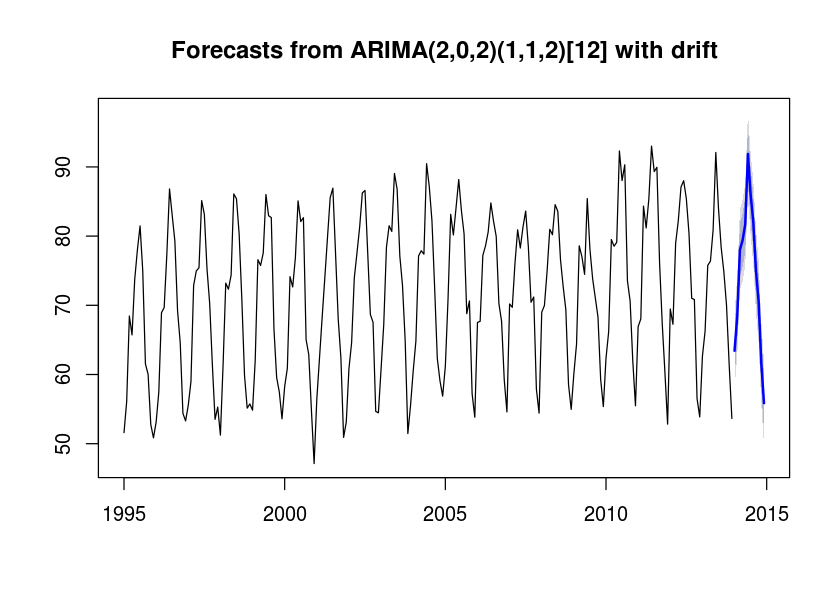

In [48]:
require(forecast)
fit.IceCream2 = auto.arima(IceCream.ts, max.order=7,
                              start.p=0,        start.q=0, 
                                max.p=2, max.d=0, max.q=2,
                              start.P=0,        start.Q=0,
                                max.P=2, max.D=1, max.Q=2)
summary(fit.IceCream2 )

## Make the forecast for the next year
IceCream2.forecast = forecast(fit.IceCream2 , h=12)
summary(IceCream2.forecast)
plot(IceCream2.forecast)

## Milk ($p=2, q=2$ had the best AIC)

In [49]:
require(forecast)
fit.Milk = auto.arima(Milk.ts, max.order=5,
                              start.p=0,        start.q=0, 
                                max.p=2, max.d=1, max.q=2,
                              start.P=0,        start.Q=0,
                                max.P=2, max.D=1, max.Q=2)
summary(fit.Milk )

Series: Milk.ts 
ARIMA(0,1,1)(0,1,2)[12] 

Coefficients:
          ma1     sma1    sma2
      -0.1558  -0.8151  0.1222
s.e.   0.0727   0.0828  0.0853

sigma^2 estimated as 0.00236:  log likelihood=342.03
AIC=-676.06   AICc=-675.87   BIC=-662.58

Training set error measures:
                        ME       RMSE        MAE          MPE     MAPE
Training set -0.0002744116 0.04684569 0.03377109 -0.008632618 1.135566
                  MASE        ACF1
Training set 0.3082424 0.005531553


In [51]:
** Good-looking coefficients and standard error*

ERROR: Error in parse(text = x, srcfile = src): <text>:1:1: unexpected '^'
1: **
    ^



Forecast method: ARIMA(0,1,1)(0,1,2)[12]

Model Information:
Series: Milk.ts 
ARIMA(0,1,1)(0,1,2)[12] 

Coefficients:
          ma1     sma1    sma2
      -0.1558  -0.8151  0.1222
s.e.   0.0727   0.0828  0.0853

sigma^2 estimated as 0.00236:  log likelihood=342.03
AIC=-676.06   AICc=-675.87   BIC=-662.58

Error measures:
                        ME       RMSE        MAE          MPE     MAPE
Training set -0.0002744116 0.04684569 0.03377109 -0.008632618 1.135566
                  MASE        ACF1
Training set 0.3082424 0.005531553

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2014       3.526812 3.464552 3.589071 3.431594 3.622029
Feb 2014       3.321209 3.239731 3.402687 3.196599 3.445819
Mar 2014       3.696466 3.599506 3.793426 3.548179 3.844753
Apr 2014       3.600059 3.489770 3.710348 3.431387 3.768732
May 2014       3.709649 3.587477 3.831821 3.522802 3.896496
Jun 2014       3.516149 3.383151 3.649148 3.312746 3.719553
Jul 2014       3.492555 3.349548

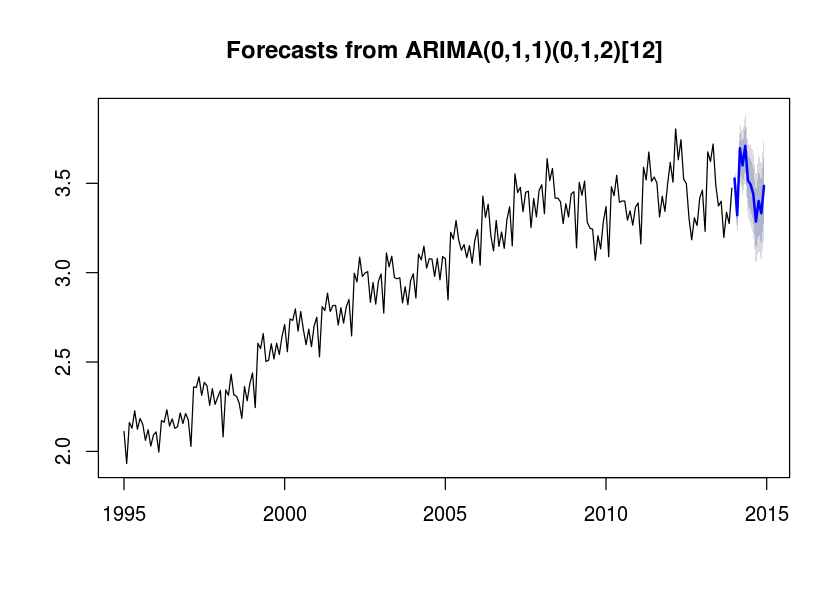

In [52]:
## Make the forecast for the next year
Milk.forecast = forecast(fit.Milk , h=12)
summary(Milk.forecast)
plot(Milk.forecast)